In [2]:
#Tasks

# 1. Long hair identification- The model should work exclusively for individuals aged between 20 and 30. If an image of a person outside this age range (below 20 or above 30) is uploaded, the model should correctly predict their gender regardless of hair length. 

In [28]:
#Long hair= Female 
#Short Hair= male 
#age 20-30

#requirements.text.file 

# 1.opencv-python>=4.5 as cv2
# 2.numpy>=1.21 ad np
# 3.matplotlib pyplot as pl
# 4. plt.show() to display images


In [4]:
import tkinter
print("Tkinter is installed!")


Tkinter is installed!


In [5]:
pip install PyQt5


Note: you may need to restart the kernel to use updated packages.


In [6]:
#Condition given 
#Age = 20-30 Long hair = Female 
#Age = 20-30 Short hair = maale 
# <20 or 30> = Real gender 

def predict_gender(gender, hair_length, age):
    if 20<= age <= 30: #Range
        return "Female" if hair_length == "Long" else "Male"
    else:
        return real_gender 





In [7]:
pip install numpy==1.26.4 --force-reinstall


  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.


In [8]:
!pip install opencv-python


In [9]:
pip install --upgrade pip setuptools wheel


Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------- ------------------ 4.5/8.1 MB 24.5 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 15.2 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.2 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 10.4 MB/s  0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   --

In [11]:
pip install opencv-python==4.8.1.78 numpy==1.26.4 --force-reinstall



  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 1.26.4

   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-1.26.4:
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-1.26.4
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
#THIS IS FULLY TRAINED MODEL, LIKE I HAVE NOT USED ANY PRETRAINED MODEL, GAVE THE DATASET 
#AND TRAINED IT AND GUI AT THE END,But the below model is to check and used by pretrained model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class HairCNN(nn.Module):
    def __init__(self):
        super(HairCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(32*22*22, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

transform = transforms.Compose([
    transforms.Resize((96,96)),
    transforms.ToTensor()
])

train_ds = datasets.ImageFolder(r"C:\Users\HP\Downloads\hair_dataset\train", transform=transform)
test_ds  = datasets.ImageFolder(r"C:\Users\HP\Downloads\hair_dataset\test", transform=transform)

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=8, shuffle=False)

model = HairCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    model.train()
    for imgs, labels in train_loader:
        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} done")

torch.save(model.state_dict(), "hair_model.pt")
print("Hair model saved as hair_model.pt")


Epoch 1 done
Epoch 2 done
Epoch 3 done
Epoch 4 done
Epoch 5 done
Hair model saved as hair_model.pt


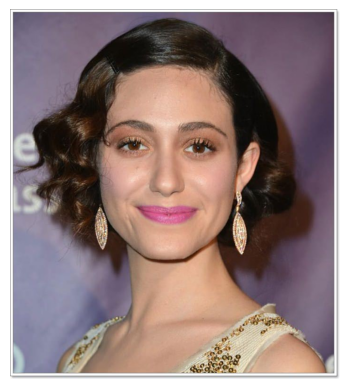

In [12]:

from matplotlib import pyplot as plt
import cv2                                #For opencv

image_path = r"C:\Users\HP\Desktop\Hair_length.jpg"
img = cv2.imread(image_path)                    #Reads the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #Converts BRG (Blue, reg, green) to RBG(red, blue, green)
plt.axis("off")
plt.show() #Will display the image



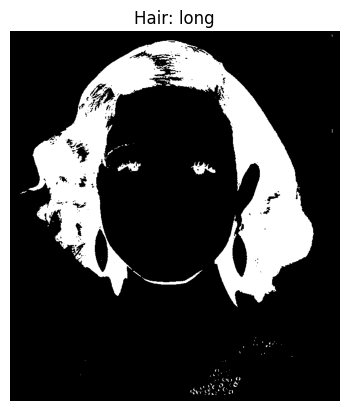

Female


In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def give_gender(age, image_path, actual_gender=None):
    img = cv2.imread(image_path)                                        #This loads the image from the given path 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                        #This will convert image into grayscale 
    _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)     #Highlights the region to identify 
    hair_score = np.count_nonzero(np.sum(thresh, axis=1) > 10000)       #Counts the region

    hair = "long" if hair_score > 30 else "short"                       #As the hair score is more than 30 here, it will consider it as long hair 

    plt.imshow(thresh, cmap='gray')
    plt.axis("off")
    plt.title(f"Hair: {hair}")
    
    plt.show()

    if 20 <= age <= 30:                                                #This was the condition given 
        return "Female" if hair == "long" else "Male"
    else:
        return actual_gender.capitalize()


print(give_gender(25, r"C:\Users\HP\Desktop\Hair_length.jpg", actual_gender="female"))


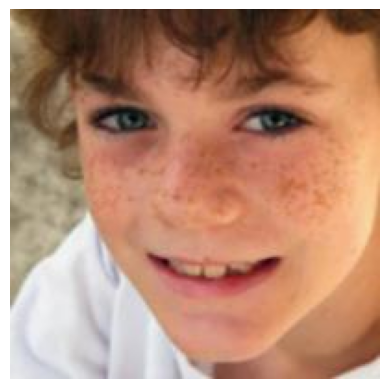

In [14]:
#To chcek if its correct, lets give 2 more different pictures (One of male and other age>30)


from matplotlib import pyplot as plt
import cv2                                #For opencv

image_path = r"C:\Users\HP\Desktop\Hair detection.jpg"
img = cv2.imread(image_path)                    #Reads the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #Converts BRG (Blue, reg, green) to RBG(red, blue, green)
plt.axis("off")
plt.show() #Will display the image



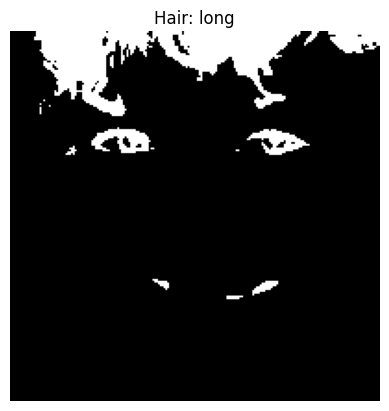

Male


In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def give_gender(age, image_path, actual_gender=None):
    img = cv2.imread(image_path)  #This loads the image from the given path 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #This will convert image into grayscale 
    _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV) #Highlights the region to identify 
    hair_score = np.count_nonzero(np.sum(thresh, axis=1) > 10000) #Counts the region

    hair = "long" if hair_score > 5 else "short" #As the hair score is more than 30 here, it will consider it as long hair 

    plt.imshow(thresh, cmap='gray')
    plt.axis("off")
    plt.title(f"Hair: {hair}")
    plt.show()

    if 20 <= age <= 30:                        #This was the condition given 
        return "Female" if hair == "long" else "Male"
    else:
        return actual_gender.capitalize()


print(give_gender( 8, r"C:\Users\HP\Desktop\Hair detection.jpg", actual_gender="male"))


#THIS GAVE MALE BEACUSE ACCORDING TO THE CONDITION, IF THE AGE IS NOT BETWEEN 20-30 IT WILL CONSIDER THE ACTUAL GENDER WHICH IS "MALE"

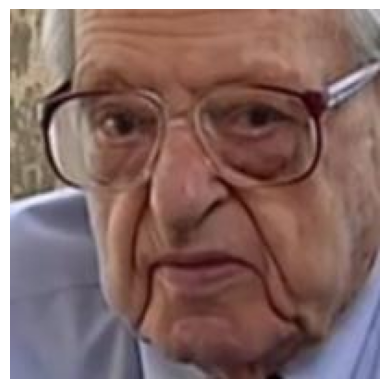

In [17]:
from matplotlib import pyplot as plt
import cv2                                #For opencv

image_path = r"C:\Users\HP\Desktop\Hair and age detection.jpg"
img = cv2.imread(image_path)                    #Reads the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #Converts BRG (Blue, reg, green) to RBG(red, blue, green)
plt.axis("off")
plt.show() #Will display the image


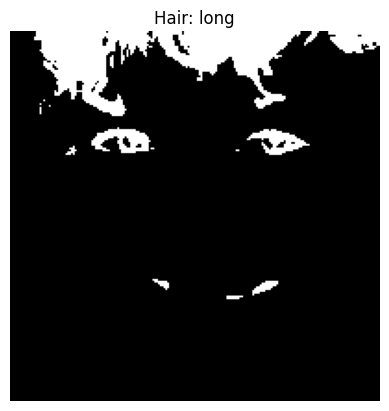

Female


In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def give_gender(age, image_path, actual_gender=None):
    img = cv2.imread(image_path)  #This loads the image from the given path 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #This will convert image into grayscale 
    _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV) #Highlights the region to identify 
    hair_score = np.count_nonzero(np.sum(thresh, axis=1) > 10000) #Counts the region

    hair = "long" if hair_score > 5 else "short" #As the hair score is more than 30 here, it will consider it as long hair 

    plt.imshow(thresh, cmap='gray')
    plt.axis("off")
    plt.title(f"Hair: {hair}")
    plt.show()

    if 20 <= age <= 30:                        #This was the condition given 
        return "Female" if hair == "long" else "Male"
    else:
        return actual_gender.capitalize()


print(give_gender( 40, r"C:\Users\HP\Desktop\Hair detection.jpg", actual_gender="FEMALE"))


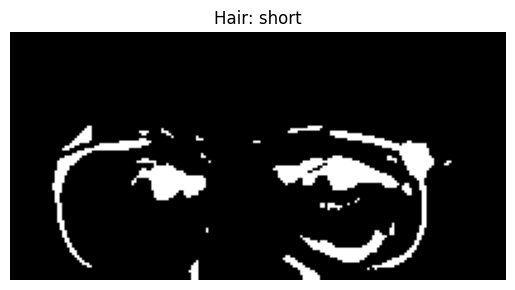

Male


In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def give_gender(age, image_path, actual_gender=None):
    img = cv2.imread(image_path)
    if img is None:
        return "Image not found."

    img = img[:img.shape[0]//2, :]  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

    hair_score = np.count_nonzero(np.sum(thresh, axis=1) > 10000)
    hair = "long" if hair_score > 30 else "short"

    plt.imshow(thresh, cmap='gray')
    plt.title(f"Hair: {hair}")
    plt.axis("off")
    plt.show()

    if 20 <= age <= 30:
        return "Female" if hair == "long" else "Male"
    else:
        return actual_gender.capitalize()

print(give_gender(8, r"C:\Users\HP\Desktop\Hair and age detection.jpg", actual_gender="male"))


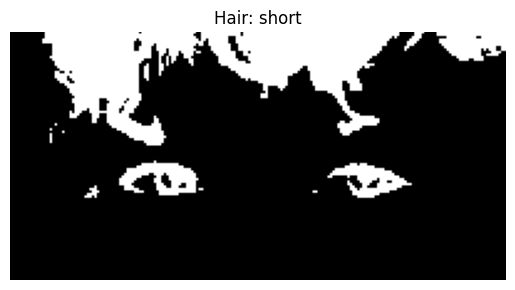

Male


In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def give_gender(age, image_path, actual_gender=None):
    img = cv2.imread(image_path)
    if img is None:
        return "Image not found."

    img = img[:img.shape[0]//2, :] 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

    hair_score = np.count_nonzero(np.sum(thresh, axis=1) > 10000)
    hair = "long" if hair_score > 30 else "short"

    plt.imshow(thresh, cmap='gray')
    plt.title(f"Hair: {hair}")
    plt.axis("off")
    plt.show()

    if 20 <= age <= 30:
        return "Female" if hair == "long" else "Male"
    else:
        return actual_gender.capitalize()

print(give_gender(8,  r"C:\Users\HP\Desktop\Hair detection.jpg", actual_gender="male"))


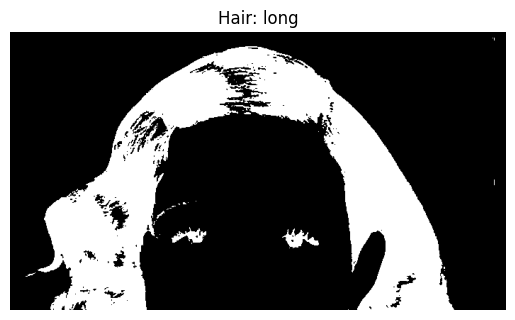

Male


In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def give_gender(age, image_path, actual_gender=None):
    img = cv2.imread(image_path)
    if img is None:
        return "Image not found."

    img = img[:img.shape[0]//2, :]  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

    hair_score = np.count_nonzero(np.sum(thresh, axis=1) > 10000)
    hair = "long" if hair_score > 30 else "short"

    plt.imshow(thresh, cmap='gray')
    plt.title(f"Hair: {hair}")
    plt.axis("off")
    plt.show()

    if 20 <= age <= 30:
        return "Female" if hair == "long" else "Male"
    else:
        return actual_gender.capitalize()

print(give_gender(8,r"C:\Users\HP\Desktop\Hair_length.jpg", actual_gender="male"))

#HERE AS I HAVE ENTERED ACTUAL GENDER AS MALE AND THE AGE RANGE IS NOT FROM 20 TO 20 IT GAVE THE RESULT AS MALE EVEN THOUGH HAIR= LONG


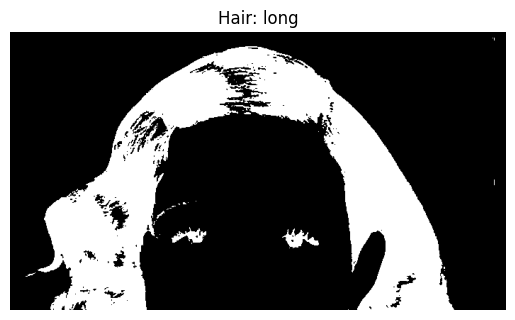

Female


In [22]:
#For the same image, now will give the age different and the actual gender female 

import numpy as np
from matplotlib import pyplot as plt

def give_gender(age, image_path, actual_gender=None):
    img = cv2.imread(image_path)
    if img is None:
        return "Image not found."

    img = img[:img.shape[0]//2, :]  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

    hair_score = np.count_nonzero(np.sum(thresh, axis=1) > 10000)
    hair = "long" if hair_score > 30 else "short"

    plt.imshow(thresh, cmap='gray')
    plt.title(f"Hair: {hair}")
    plt.axis("off")
    plt.show()

    if 20 <= age <= 30:
        return "Female" if hair == "long" else "Male"
    else:
        return actual_gender.capitalize()

print(give_gender(28,r"C:\Users\HP\Desktop\Hair_length.jpg", actual_gender="male")) 
#NOW IT GAVE CORRECTLY THAT ITS A FEMALE BECAUSE THE AGE IS IN BETWEEN THE THE GIVEN RANGE WHICH IS 20-30

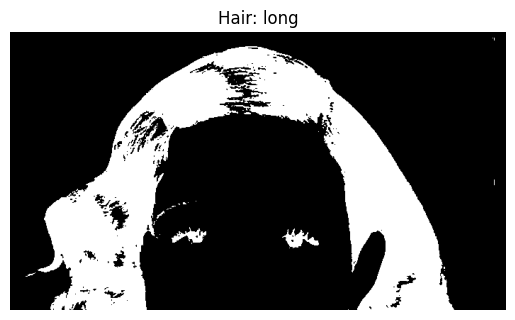

Female


In [23]:
# LETS TRY GIVING THE ACTUAL GENDER AS FEMALE AND GIVE THE AGE OUT OF THE RANGE SO CHCEK THE OUTPUT

import numpy as np
from matplotlib import pyplot as plt

def give_gender (age, image_path, actual_gender=None):
    img = cv2.imread(image_path)
    if img is None:
        return "Image not found."

    img = img[:img.shape[0]//2, :]  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

    hair_score = np.count_nonzero(np.sum(thresh, axis=1) > 10000)
    hair = "long" if hair_score > 30 else "short"

    plt.imshow(thresh, cmap='gray')
    plt.title(f"Hair: {hair}")
    plt.axis("off")
    plt.show()

    if 20 <= age <= 30:
        return "Female" if hair == "long" else "Male"
    else:
        return actual_gender.capitalize()

print(give_gender(10,r"C:\Users\HP\Desktop\Hair_length.jpg", actual_gender="Female"))

In [24]:
#IT GAVE THE OUTPUT AS FEMALE BECAUSE THE AGE OUT OF RANGE 20-30, SO IT TOOK THE ACTUAL GNEDER GIVEN WHICH WAS FEMALE 

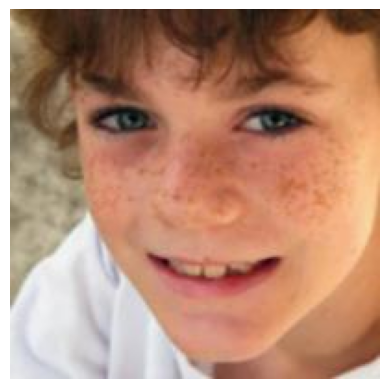

In [25]:
#To chcek if its correct, lets give 2 more different pictures (One of male and other age>30)


from matplotlib import pyplot as plt
import cv2                                

image_path = r"C:\Users\HP\Desktop\Hair detection.jpg"
img = cv2.imread(image_path)                    #This wIll read the  image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #Converts BRG (Blue, reg, green) to RBG(red, blue, green)
plt.axis("off")
plt.show() #Will display the image


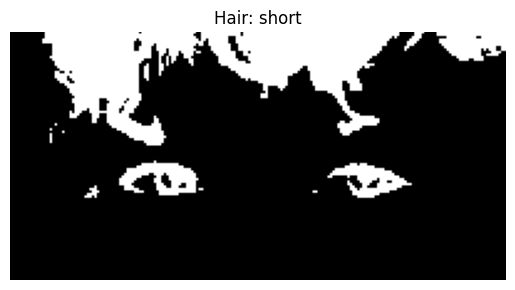

Male


In [26]:
import numpy as np
from matplotlib import pyplot as plt

def give_gender(age, image_path, actual_gender=None):
    img = cv2.imread(image_path)
    if img is None:
        return "Image not found."

    img = img[:img.shape[0]//2, :]  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

    hair_score = np.count_nonzero(np.sum(thresh, axis=1) > 10000)
    hair = "long" if hair_score > 30 else "short"

    plt.imshow(thresh, cmap='gray')
    plt.title(f"Hair: {hair}")
    plt.axis("off")
    plt.show()

    if 20 <= age <= 30:
        return "Female" if hair == "long" else "Male"
    else:
        return actual_gender.capitalize()

print(give_gender(12,r"C:\Users\HP\Desktop\Hair detection.jpg", actual_gender="male"))

In [ ]:
#THIS IS THE FINALE CODE TO PREDICT THE GENDER BY THE LENGTH OF HAIR AND RANGE AGE= 20-30
#BUT THIS IS BY PRETRAINED MODEL, ABOVE IS WHERE I HAVE TRAINED THE MODEL


import numpy as np
from matplotlib import pyplot as plt

def give_gender(age, image_path, actual_gender=None):
    img = cv2.imread(image_path)
    if img is None:
        return "Image not found."

    img = img[:img.shape[0]//2, :]  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

    hair_score = np.count_nonzero(np.sum(thresh, axis=1) > 10000)
    hair = "long" if hair_score > 30 else "short"

    plt.imshow(thresh, cmap='gray')
    plt.title(f"Hair: {hair}")
    plt.axis("off")
    plt.show()

    if 20 <= age <= 30:
        return "Female" if hair == "long" else "Male"
    else:
        return actual_gender.capitalize()

print(give_gender(age ,r"C:\Users\HP\Desktop\Hair_length.jpg", actual_gender="Gender"))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for imgs, labels in test_loader:
        out = model(imgs)
        preds = torch.argmax(out, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.numpy())

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=test_ds.classes))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=test_ds.classes, yticklabels=test_ds.classes, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Hair Detection Confusion Matrix")
plt.show()


In [13]:
#NOW FOE GUI MODEL TO DETECT THE LENGTH OD HAIR


import torch
from tkinter import Tk, Button, Text, filedialog, StringVar, OptionMenu
from PIL import Image
from torchvision import transforms

class HairCNN(nn.Module):
    def __init__(self):
        super(HairCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(32*22*22, 128)
        self.fc2 = nn.Linear(128, 2)
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

transform = transforms.Compose([transforms.Resize((96,96)), transforms.ToTensor()])
model = HairCNN()
model.load_state_dict(torch.load("hair_model.pt"))
model.eval()

def run_pipeline():
    fpath = filedialog.askopenfilename()
    if not fpath: return
    age = int(age_var.get())
    real_gender = gender_var.get()

    pil = Image.open(fpath).convert("RGB")
    x = transform(pil).unsqueeze(0)
    pred = torch.argmax(model(x), 1).item()
    hair = "Long" if pred==0 else "Short"

    if 20 <= age <= 30:
        gender = "Female" if hair=="Long" else "Male"
    else:
        gender = real_gender

    output.delete("1.0","end")
    output.insert("end", f"Age: {age}\nHair: {hair}\nPredicted Gender: {gender}")

root = Tk(); root.title("Hair-based Gender Detection")
age_var = StringVar(root); age_var.set("25")
gender_var = StringVar(root); gender_var.set("Male")

OptionMenu(root, gender_var, "Male","Female").pack()
OptionMenu(root, age_var, *[str(i) for i in range(15,50)]).pack()
Button(root, text="Upload & Predict", command=run_pipeline).pack()
output = Text(root, height=10, width=40); output.pack()
root.mainloop()


In [1]:
import os
os.listdir()


['.anaconda',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.deepface',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.ms-ad',
 '.vscode',
 '1. Long Hair_model.ipynb',
 '1.ipynb',
 '1123.ipynb',
 '2.Gender, senior citizen_model.ipynb',
 '3.Age&emotions_model.ipynb',
 '3D Objects',
 '4.Sign language.ipynb',
 '5.Car detection.ipynb',
 '6.Nationality model.ipynb',
 'Advanced data science.ipynb',
 'age.pt',
 'age_deploy.prototxt',
 'age_gender_model.h5',
 'age_gender_model.keras',
 'age_gender_seniorcitizen_model.h5',
 'age_gender_seniorcitizen_model.keras',
 'age_gender_senirocitizen_model.h5',
 'age_model.keras',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'Array.ipynb',
 'Contacts',
 'Cookies',
 'Creative Cloud Files',
 'Data science project.ipynb',
 'Desktop',
 'Documents',
 'Downloads',
 'edb_mtk.exe',
 'edb_npgsql.exe',
 'edb_pem_agent.exe',
 'edb_pem_agent.exe-20250325115153',
 'edb_pem_agent.exe-20250325120230',
 'edb_